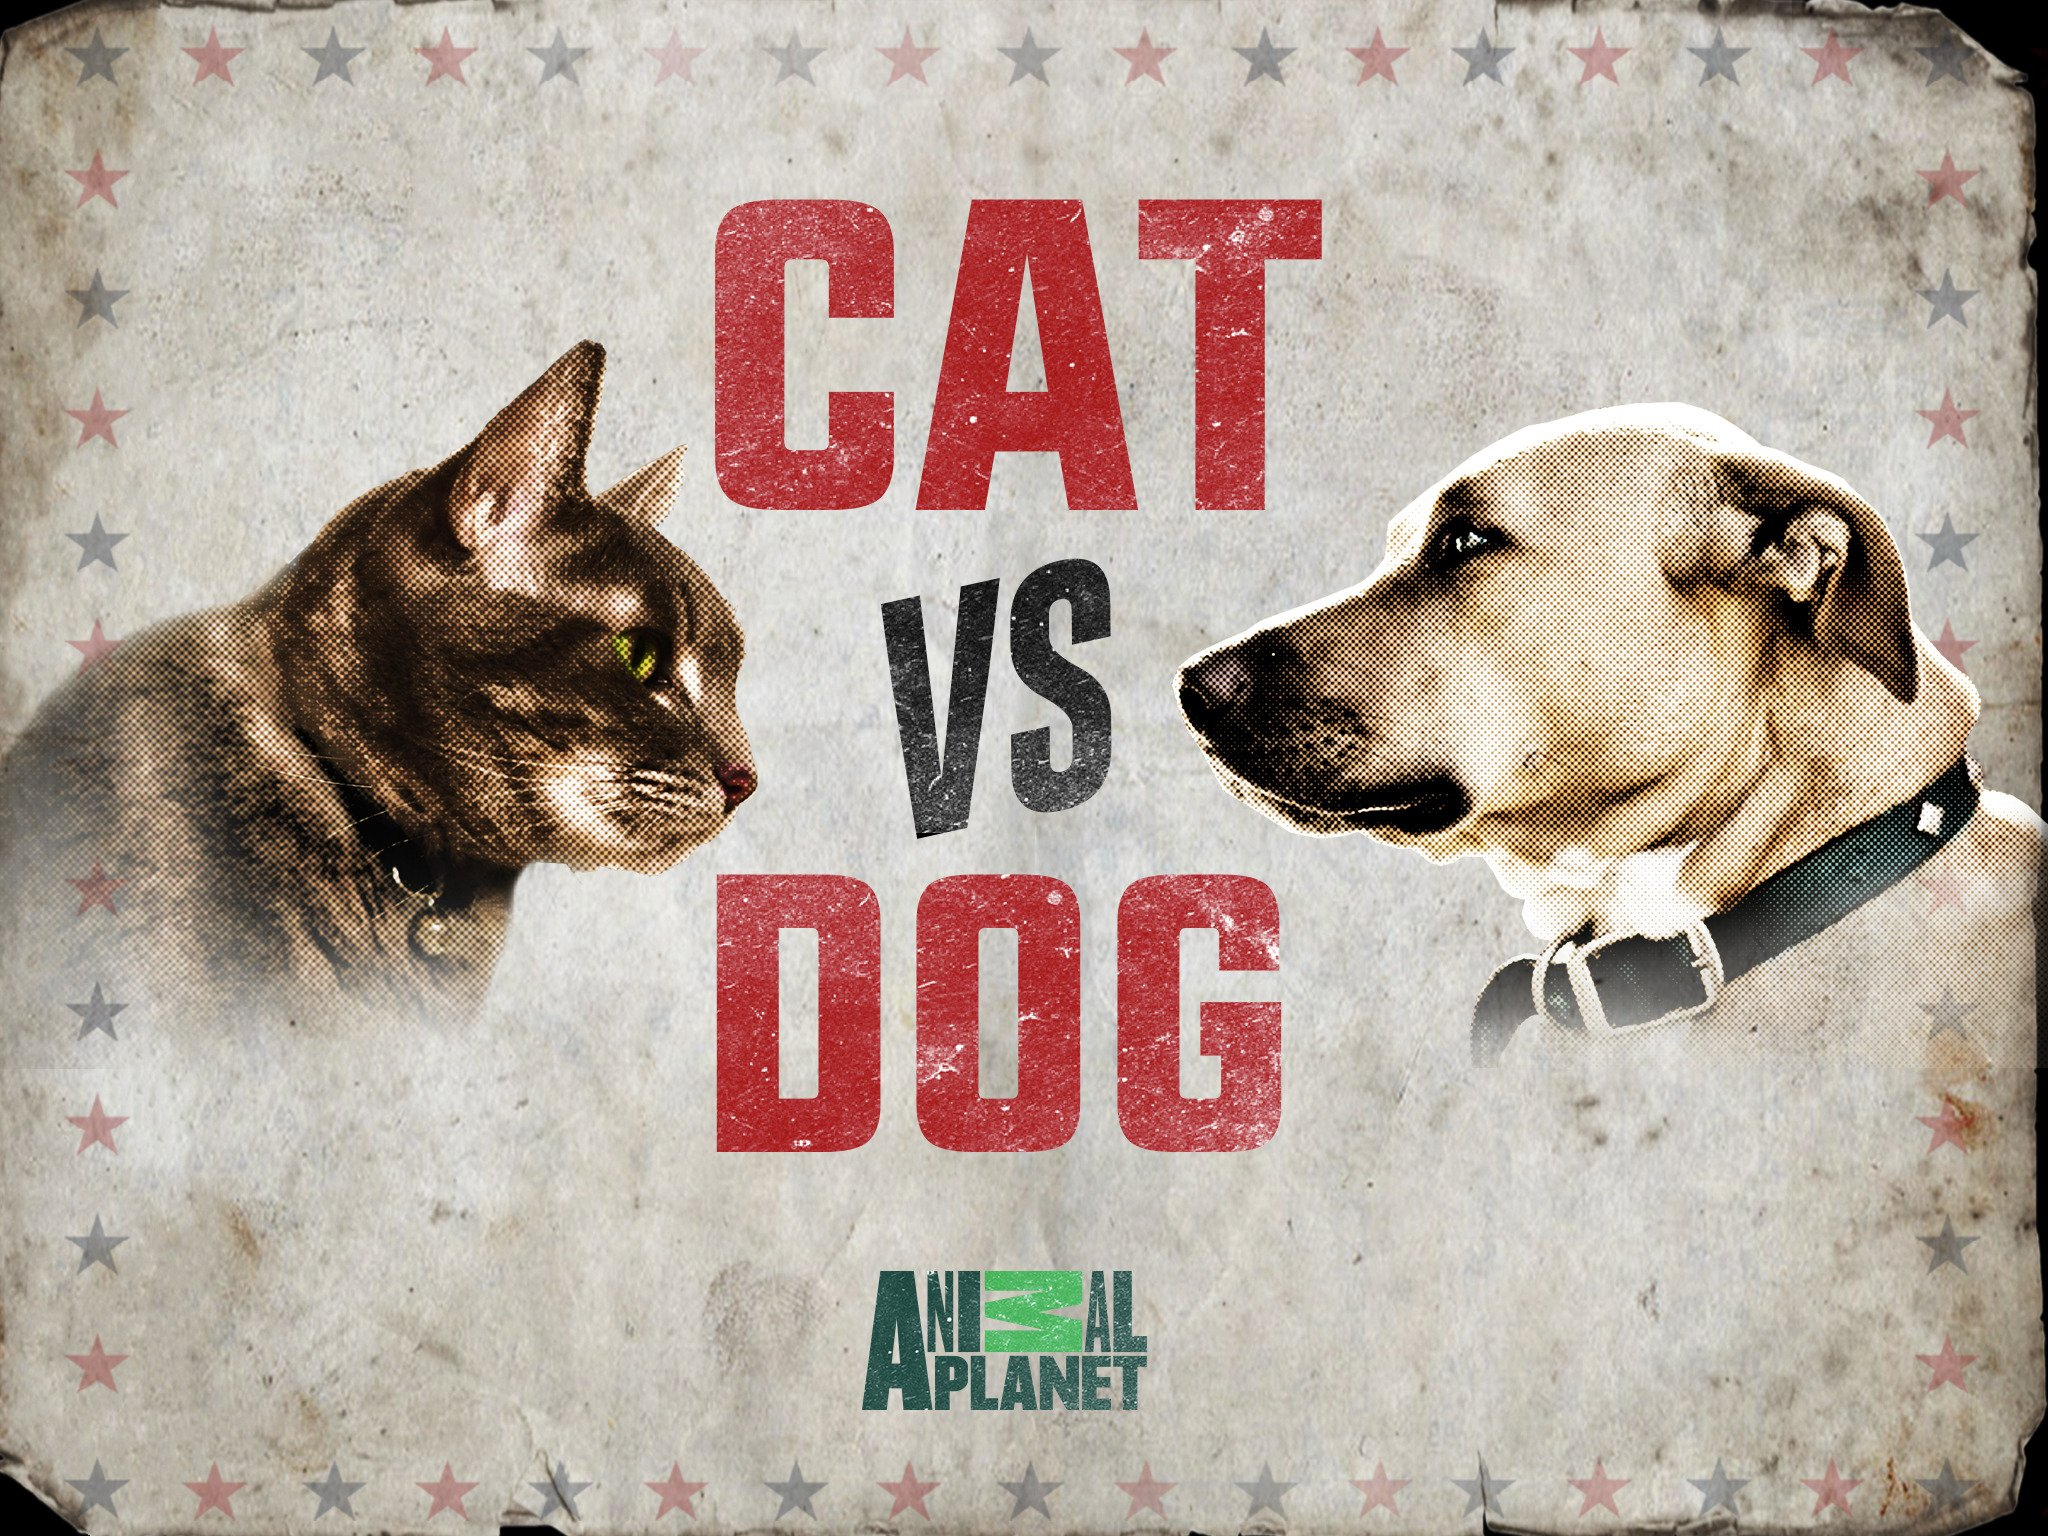

In [42]:
from IPython.display import Image
Image(r'C:\Users\arieh\OneDrive\Desktop\Not onedrive document\second semester final project\cats vs dogs\heading pic.jpg')

### The aim of this note book, is to be able to classify between cats and dogs images. 

In [36]:
import cv2
import pandas as pd
import numpy as np
import os               
from random import shuffle
from tqdm import tqdm 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
import random
import seaborn as sns
from skimage.io import imread
#models
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
#scores
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

### Display a few pictures from the folder

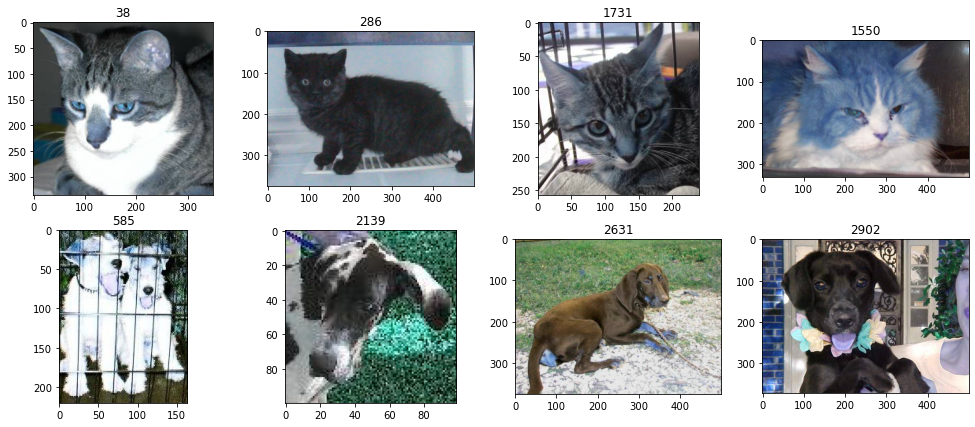

In [39]:
f = plt.figure(figsize=(17,7))
path = r'C:\Users\arieh\OneDrive\Desktop\Not onedrive document\second semester final project\cats vs dogs\train\cat.0.jpg'
for i in range(1,5):
    r=random.randint(1,4001)
    img=cv2.imread(r'C:\Users\arieh\OneDrive\Desktop\Not onedrive document\second semester final project\cats vs dogs\train\cat.{}.jpg'.format(r))
    ax=f.add_subplot(2,4,i)
    ax.title.set_text(r)
    plt.imshow(img)
    r=random.randint(1,4001)
    img=cv2.imread(r'C:\Users\arieh\OneDrive\Desktop\Not onedrive document\second semester final project\cats vs dogs\train\dog.{}.jpg'.format(r))
    ax=f.add_subplot(2,4,i+4)
    ax.title.set_text(r)
    plt.imshow(img)

### Checking the shape of the pictures to understand how our DF will look 

In [40]:
img_dog = cv2.imread(r'C:\Users\arieh\OneDrive\Desktop\Not onedrive document\second semester final project\cats vs dogs\train\dog.364.jpg', 0)
img_dog2 = cv2.imread(r'C:\Users\arieh\OneDrive\Desktop\Not onedrive document\second semester final project\cats vs dogs\train\dog.5672.jpg', 0)
img_cat = cv2.imread(r'C:\Users\arieh\OneDrive\Desktop\Not onedrive document\second semester final project\cats vs dogs\train\cat.193.jpg', 0)
img_cat2 = cv2.imread(r'C:\Users\arieh\OneDrive\Desktop\Not onedrive document\second semester final project\cats vs dogs\train\cat.4444.jpg', 0)
print('Dogs picture 1 size : ',img_dog.shape)
print('Dogs picture 2 size : ',img_dog2.shape)
print('Cats picture 1 size : ',img_cat.shape)
print('Cats picture 2 size : ',img_cat2.shape)

Dogs picture 1 size :  (499, 477)
Dogs picture 2 size :  (499, 490)
Cats picture 1 size :  (199, 180)
Cats picture 2 size :  (262, 349)


As we can see two cat images are different sizes, i'm sure dog pictures are also different sizes 
### We will resize all our pictures and make a DF

In [7]:
TRAIN_FILE = r'C:\Users\arieh\OneDrive\Desktop\Not onedrive document\second semester final project\cats vs dogs\train' 
PIC_SIZE = 50
LR = 1e-3

MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR, '2conv-basic')

In [8]:
def label_img(img):
    word_label = img.split('.')[-3]
   
    if word_label == 'cat': return 1
    #                             
    elif word_label == 'dog': return 0

In [9]:
label_data =[]
training_data = []
for img in tqdm(os.listdir(TRAIN_FILE)):
        label = label_img(img)
        path = os.path.join(TRAIN_FILE,img)
        img = cv2.imread(path, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (PIC_SIZE,PIC_SIZE))
        training_data.append(pd.Series(img.flatten()))
        label_data.append(label)

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [02:28<00:00, 168.31it/s]


In [10]:
pictures_df = pd.DataFrame(training_data)
labels_df = pd.DataFrame(label_data, columns = ['labels'])

In [11]:
df = pd.concat([pictures_df , labels_df], axis =1)

In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,7491,7492,7493,7494,7495,7496,7497,7498,7499,labels
0,92,169,208,100,177,216,104,182,225,110,...,0,2,2,0,2,2,0,2,2,1
1,43,43,39,64,58,55,36,40,35,44,...,47,53,70,52,57,75,20,26,39,1
2,53,45,38,61,47,41,64,54,47,69,...,52,150,165,2,183,185,10,183,187,1
3,217,222,221,220,225,224,237,235,235,239,...,208,210,210,218,220,219,207,212,215,1
4,72,109,137,83,120,148,48,87,115,90,...,82,105,120,59,91,102,64,90,102,1


In [13]:
df.shape

(25000, 7501)

As we can see our DF matches the amount of pictures we have now lets see if it needs any cleaning

In [15]:
df.isna().sum()

0         0
1         0
2         0
3         0
4         0
         ..
7496      0
7497      0
7498      0
7499      0
labels    0
Length: 7501, dtype: int64

In [17]:
df['labels'].value_counts()

0    12500
1    12500
Name: labels, dtype: int64

our data is very balanced and no missing values, its time to process.

## Splitting our data 

In [19]:
X = df.drop(['labels'], axis = 1)
y = df['labels']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=120)
print(" Shape of x_train = ", X_train.shape)
print(" Shape of x_test = ", X_test.shape)
print(" Shape of y_train = ", y_train.shape)
print(" Shape of y_test = ", y_test.shape)

 Shape of x_train =  (17500, 7500)
 Shape of x_test =  (7500, 7500)
 Shape of y_train =  (17500,)
 Shape of y_test =  (7500,)


In [22]:
resize = Pipeline([
 ("std_scaler", StandardScaler()),
 ("pca", PCA(n_components=0.95, random_state=0,svd_solver='full')),
])
x_train_reduced = resize.fit_transform(X_train)
x_test_reduced = resize.transform(X_test)

## The model i will use is Bagging


In [25]:
xg_boost = XGBClassifier(subsample=1 ,n_estimators = 150,min_child_weight=5,max_depth=3,learning_rate=0.2, gamma=2, n_jobs = -1,colsample_bytree=1)
xg_boost.fit(x_train_reduced,y_train)
xg_boost.score(x_test_reduced, y_test)

[15:24:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6397333333333334

In [26]:
bag_clf = BaggingClassifier(
 xg_boost, n_estimators=30,
 random_state=40, bootstrap_features=True, n_jobs=-1)
bag_clf.fit(x_train_reduced, y_train)
bag_clf.score(x_test_reduced, y_test)

0.6522666666666667

In [27]:
report = classification_report(y_test, bag_clf.predict(x_test_reduced))
print(report)

              precision    recall  f1-score   support

           0       0.66      0.62      0.64      3724
           1       0.65      0.69      0.67      3776

    accuracy                           0.65      7500
   macro avg       0.65      0.65      0.65      7500
weighted avg       0.65      0.65      0.65      7500



My accuracy is 65% using bagging method. 